# Glovo Interview Ricardo Huarte

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from fancyimpute import KNN    
from sklearn.model_selection import train_test_split,cross_val_score, KFold, StratifiedKFold ,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder, Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve, precision_recall_curve, \
average_precision_score,make_scorer,recall_score, accuracy_score, precision_score

from sklearn import svm

from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

## About Data Set:
You will find 2 .csv files attached to this task. 1 of the files consist of courier’s lifetime dependent features and other consist courier’s weekly variant features. Features are renamed for confidentiality purposes and data dictionary will NOT be provided. However, in 2 different .csv files, same courier ID represents same courier.

## Task 1: Exploratory Analysis and Data Munging

In this task, you are being expected to clean data, treat missing values, find out related features and finally label the data.
Every courier did not work every week. Thus, some of courier-week combinations’ data are not provided. First, come up with a way to treat these missing values. Removing missing values are not suggested since provided data set is small and it will affect your predictive model’s evaluation metric.
Create a report / dashboard and correlation matrix, in addition to results of your univariate and bivariate analysis and explain your findings.
Finally, label your data. If a specific courier’s week 9, 10 and 11 data is not provided, we label this courier as “1” otherwise “0”. After labeling, remove week 8(Yes including 8!), 9, 10 and 11 data to avoid bias in your next task. In addition, distribution of feature_3 is a hint how the data is generated.

In [5]:
%matplotlib inline

In [6]:
weekly = pd.read_csv(filepath_or_buffer='Courier_weekly_data.csv')

In [7]:
weekly.head(20)

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,3767,2,6,34,38,0.0789,0.9211,140.4737,0.1316,2162.4737,0.7632,7.340776,8,20.208158,5.236316,0.8158,43.384804,1,19
1,3767,4,-1,42,37,0.0000,1.0000,135.5946,0.0811,2097.4054,0.9459,11.883784,19,18.855405,5.689459,0.8919,35.078042,3,11
2,3767,5,24,41,43,0.0233,0.9767,131.0930,0.0233,2043.8837,0.9302,7.072100,16,18.925116,5.138605,0.9302,31.455285,1,10
3,3767,6,-22,65,66,0.0606,0.9394,120.1515,0.0000,2124.2727,0.7727,7.356567,33,18.259697,4.704394,0.7879,34.252991,1,30
4,6282,2,9,33,27,0.0741,0.9259,100.0000,0.0370,4075.7407,0.8889,8.501233,5,26.863704,4.828519,0.8889,46.478114,1,4
5,6282,3,-20,42,56,0.0536,0.9464,113.4821,0.0357,4777.0714,0.9107,8.210125,16,23.651786,5.553571,0.9107,79.407407,2,5
6,6282,4,9,22,32,0.1250,0.8750,105.0000,0.0938,5744.1875,0.8125,8.285422,12,18.180937,5.834375,0.7813,87.250000,1,2
7,6282,5,21,31,48,0.0417,0.9583,117.2500,0.0833,4011.7708,0.9167,9.768052,17,20.346667,5.615417,0.9167,85.083333,2,9
8,6282,6,-12,52,72,0.0694,0.9306,107.6389,0.0417,4000.3333,0.8472,7.736114,17,21.941111,5.093056,0.8750,73.904915,1,13
9,6282,7,1,40,56,0.0893,0.9107,124.3750,0.0893,3192.0000,0.9107,7.405355,11,18.591071,5.353214,0.9107,65.618750,2,4


### Checking how many couriers worked on the given weeks

In [8]:
weekly[(weekly.week==11) | (weekly.week==10) | (weekly.week==9)]['courier'].drop_duplicates().count()


387

In [9]:
weeks=weekly.copy()

In [10]:
# function to create the label for the pertinent weeks
def week_label(row):
    courier_set=weekly[(weekly.courier==row['courier']) & ((weekly.week==9) | (weekly.week==10) |(weekly.week==11))]
    if courier_set['courier'].count() == 0:
        label=1
    else: 
        label=0
    return label

In [11]:
weeks['label']=weeks.apply(week_label, axis=1)


In [12]:
# keeping only given weeks for prediction
weeks=weeks[(weeks.week<8)]

In [94]:
weeks.head(10)

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,label
0,3767,2,6,34,38,0.0789,0.9211,140.4737,0.1316,2162.4737,0.7632,7.340776,8,20.208158,5.236316,0.8158,43.384804,1,19,1
1,3767,4,-1,42,37,0.0000,1.0000,135.5946,0.0811,2097.4054,0.9459,11.883784,19,18.855405,5.689459,0.8919,35.078042,3,11,1
2,3767,5,24,41,43,0.0233,0.9767,131.0930,0.0233,2043.8837,0.9302,7.072100,16,18.925116,5.138605,0.9302,31.455285,1,10,1
3,3767,6,-22,65,66,0.0606,0.9394,120.1515,0.0000,2124.2727,0.7727,7.356567,33,18.259697,4.704394,0.7879,34.252991,1,30,1
4,6282,2,9,33,27,0.0741,0.9259,100.0000,0.0370,4075.7407,0.8889,8.501233,5,26.863704,4.828519,0.8889,46.478114,1,4,0
5,6282,3,-20,42,56,0.0536,0.9464,113.4821,0.0357,4777.0714,0.9107,8.210125,16,23.651786,5.553571,0.9107,79.407407,2,5,0
6,6282,4,9,22,32,0.1250,0.8750,105.0000,0.0938,5744.1875,0.8125,8.285422,12,18.180937,5.834375,0.7813,87.250000,1,2,0
7,6282,5,21,31,48,0.0417,0.9583,117.2500,0.0833,4011.7708,0.9167,9.768052,17,20.346667,5.615417,0.9167,85.083333,2,9,0
8,6282,6,-12,52,72,0.0694,0.9306,107.6389,0.0417,4000.3333,0.8472,7.736114,17,21.941111,5.093056,0.8750,73.904915,1,13,0
9,6282,7,1,40,56,0.0893,0.9107,124.3750,0.0893,3192.0000,0.9107,7.405355,11,18.591071,5.353214,0.9107,65.618750,2,4,0


In [97]:
week_corr=weeks.corr()
week_corr

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,label
courier,1.000000,-0.015157,-0.014839,-0.295018,-0.122965,-0.136194,0.136195,-0.078332,-0.015384,-0.128688,0.036512,0.103324,-0.122534,0.058832,-0.049446,-0.032731,0.159460,0.010606,-0.003218,0.059304
week,-0.015157,1.000000,-0.039383,0.107051,0.099521,-0.041087,0.041089,-0.001975,-0.241091,-0.182970,0.189028,-0.059178,0.096278,-0.036670,-0.143469,0.128672,-0.166104,0.016260,-0.046736,-0.121221
feature_1,-0.014839,-0.039383,1.000000,-0.184446,-0.107637,-0.031917,0.031922,0.070689,0.064166,0.002230,0.074508,0.039383,-0.076708,-0.011538,-0.014918,0.075377,0.118299,-0.080792,-0.146044,-0.141484
feature_2,-0.295018,0.107051,-0.184446,1.000000,0.789734,0.204216,-0.204217,0.024098,-0.007325,0.148288,-0.151889,-0.147253,0.728876,-0.190415,0.027817,0.001587,-0.177244,0.431344,0.389612,-0.321570
feature_3,-0.122965,0.099521,-0.107637,0.789734,1.000000,0.172822,-0.172824,0.076154,0.022822,0.076955,-0.083210,-0.159738,0.877003,-0.184805,-0.037864,0.061767,0.301041,0.490255,0.411608,-0.395466
feature_4,-0.136194,-0.041087,-0.031917,0.204216,0.172822,1.000000,-1.000000,-0.121234,0.003779,0.217479,-0.630019,-0.234667,0.062843,-0.305215,0.066944,-0.434895,0.002686,0.047584,0.144664,-0.036159
feature_5,0.136195,0.041089,0.031922,-0.204217,-0.172824,-1.000000,1.000000,0.121234,-0.003778,-0.217481,0.630022,0.234670,-0.062844,0.305213,-0.066947,0.434899,-0.002686,-0.047586,-0.144666,0.036156
feature_6,-0.078332,-0.001975,0.070689,0.024098,0.076154,-0.121234,0.121234,1.000000,0.163850,-0.156730,0.188016,-0.038979,0.061189,0.019752,0.233384,0.158231,0.038158,0.022463,0.006640,-0.051626
feature_7,-0.015384,-0.241091,0.064166,-0.007325,0.022822,0.003779,-0.003778,0.163850,1.000000,0.113607,0.072526,-0.027542,0.004092,-0.014958,-0.032110,0.153089,0.179909,0.070922,-0.005763,-0.067344
feature_8,-0.128688,-0.182970,0.002230,0.148288,0.076955,0.217479,-0.217481,-0.156730,0.113607,1.000000,-0.162868,-0.105808,0.052372,0.007692,0.648861,-0.106252,0.140880,0.102029,0.064077,-0.002860


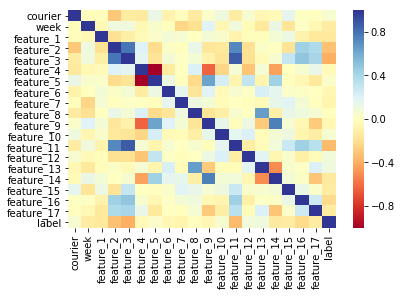

In [98]:
sns.heatmap(week_corr, vmax=1., square=False,cmap="RdYlBu")

(array([398., 596., 676., 608., 383., 226.,  89.,  34.,   9.,   6.]),
 array([  1. ,  19.3,  37.6,  55.9,  74.2,  92.5, 110.8, 129.1, 147.4,
        165.7, 184. ]),
 <a list of 10 Patch objects>)

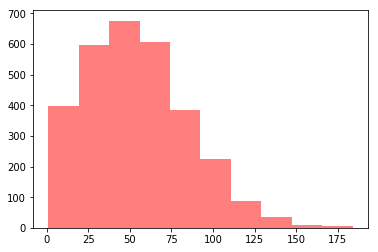

In [99]:
plt.hist(weeks.feature_3,alpha=0.5,color='red')

Text(0.5,1,'churned')

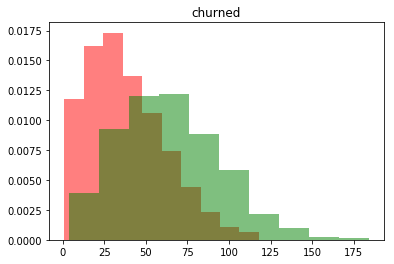

In [100]:
#normalize histogram
plt.hist(weeks[(weeks.label==1)].feature_3,alpha=0.5,color='red',density=1)
plt.hist(weeks[(weeks.label==0)].feature_3,alpha=0.5,color='green',density=1)
plt.title('churned')

In [14]:
def max_consecutive(vector):
    longest = 0
    current = 0
    for num in vector:
        if num == 1:
            current += 1
        else:
            longest = max(longest, current)
            current = 0

    return max(longest, current)
    

In [15]:
def latest_streak(series):
    week_vector=[0,0,0,0,0,0,0,0]
    count=0
    
    for i in series:
        week_vector[i]=1
    reversed_week=list(reversed(week_vector))
    for i in reversed_week:
        if i==1:
            count+=1
        else: 
            break
    return count

    

In [16]:
max_consecutive([0,1,1,1,0,0,1,0,1,1,1,1,1,1,0])

6

In [17]:
def max_streak(series):
    week_vector=[0,0,0,0,0,0,0,0]
    
    for i in series:
        week_vector[i]=1
    streak=max_consecutive(week_vector)
    return streak
    
        
        

In [18]:
def get_range(series):
    return max(series)-min(series)

In [19]:
def lifetime_mean(series):
    return np.sum(series)/8

In [664]:
aggreg=get_range
aggreg='mean'
#aggreg=lifetime_mean
aggregname='mean'



In [21]:
# trying different aggregation methods on the data
gold=weeks.groupby(['courier','label'], as_index=False )\
.agg({'week':['count', max_streak,latest_streak],\
              'feature_1':['mean',lifetime_mean],\
               'feature_2':['mean',lifetime_mean],'feature_3':['mean',lifetime_mean]\
      ,'feature_4':['mean',lifetime_mean],'feature_5':['mean',lifetime_mean]\
      ,'feature_6':['mean',lifetime_mean],'feature_7':['mean',lifetime_mean]\
      ,'feature_8':['mean',lifetime_mean],'feature_9':['mean',lifetime_mean]\
      ,'feature_10':['mean',lifetime_mean],'feature_11':['mean',lifetime_mean]\
     ,'feature_12':['mean',lifetime_mean],'feature_13':['mean',lifetime_mean]\
     ,'feature_14':['mean',lifetime_mean],'feature_15':['mean',lifetime_mean]\
     ,'feature_16':['mean',lifetime_mean],'feature_17':['mean',lifetime_mean]})

In [665]:
gold=weeks.groupby(['courier','label'], as_index=False )\
.agg({'week':['count', max_streak,latest_streak],\
              'feature_1':'mean',\
               'feature_2':'mean','feature_3':'mean'\
      ,'feature_4':'mean','feature_5':'mean'\
      ,'feature_6':'mean','feature_7':'mean'\
      ,'feature_8':'mean','feature_9':'mean'\
      ,'feature_10':'mean','feature_11':'mean'\
     ,'feature_12':'mean','feature_13':'mean'\
     ,'feature_14':'mean','feature_15':'mean'\
     ,'feature_16':'mean','feature_17':'mean'})

In [666]:
gold=weeks.groupby(['courier','label'], as_index=False )\
.agg({'week':['count', max_streak,latest_streak],\
              'feature_1':aggreg,\
               'feature_2':aggreg,'feature_3':aggreg\
      ,'feature_4':aggreg,'feature_5':aggreg\
      ,'feature_6':aggreg,'feature_7':aggreg\
      ,'feature_8':aggreg,'feature_9':aggreg\
      ,'feature_10':aggreg,'feature_11':aggreg\
     ,'feature_12':aggreg,'feature_13':aggreg\
     ,'feature_14':aggreg,'feature_15':aggreg\
     ,'feature_16':aggreg,'feature_17':aggreg})

In [667]:
gold[(gold.courier==6282)]

courier label  week                          feature_1  feature_2 feature_3  \
                count max_streak latest_streak      mean       mean      mean   
1    6282     0     6          6             6  1.333333  36.666667      48.5   

  feature_4 feature_5    ...       feature_8 feature_9 feature_10 feature_11  \
       mean      mean    ...            mean      mean       mean       mean   
1  0.075517  0.924483    ...      4300.18395  0.881117   8.317717       13.0   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  
        mean       mean       mean       mean       mean       mean  
1  21.595879   5.379692    0.88055  72.957087        1.5   6.166667  

[1 rows x 22 columns]

In [668]:
gold.columns = [gold + i for gold, i in zip(gold.columns.get_level_values(0), gold.columns.get_level_values(1).astype(str))]
golden_names=[w.replace(aggregname,'') for w in gold.columns.get_level_values(0)]
gold.columns = golden_names
gold=gold.rename(columns={'label':'y'})
gold.set_index('courier', inplace=True)

In [669]:
#gold.columns = [gold  for gold in gold.columns.get_level_values(0)]

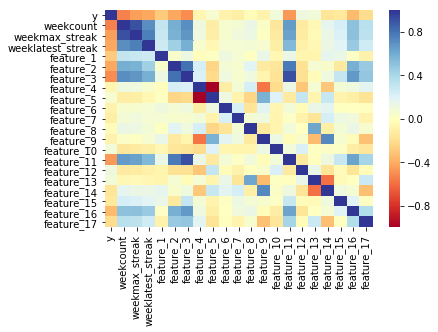

In [670]:
gold_corr=gold.corr()
sns.heatmap(gold_corr, vmax=1., square=False,cmap="RdYlBu")

In [671]:
gold.head(3)

,y,weekcount,weekmax_streak,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
courier,,,,,,,,,,,,,,,,,,,,,
3767,1,4,3,0,1.750000,45.500000,46.0,0.040700,0.959300,131.82820,...,2107.008875,0.853000,8.413307,19.0,19.062094,5.192193,0.85645,36.042781,1.5,17.500000
6282,0,6,6,6,1.333333,36.666667,48.5,0.075517,0.924483,111.29100,...,4300.183950,0.881117,8.317717,13.0,21.595879,5.379692,0.88055,72.957087,1.5,6.166667
10622,1,2,2,0,-3.500000,84.500000,54.0,0.119050,0.880950,100.15875,...,2576.890500,0.623800,10.199895,20.5,21.568016,4.179873,0.66030,35.646190,2.5,15.500000


Text(0.5,1,'churned')

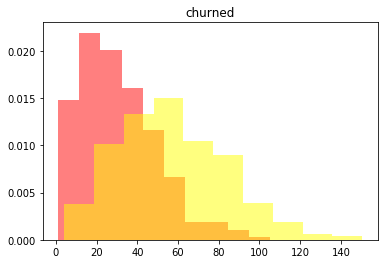

In [672]:
plt.hist(gold[(gold.y==1)].feature_3,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_3,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

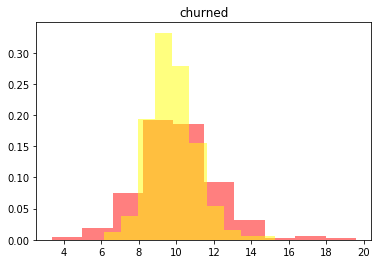

In [673]:
plt.hist(gold[(gold.y==1)].feature_10,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_10,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

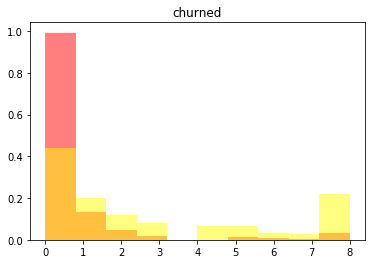

In [674]:
plt.hist(gold[(gold.y==1)].weeklatest_streak,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].weeklatest_streak,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

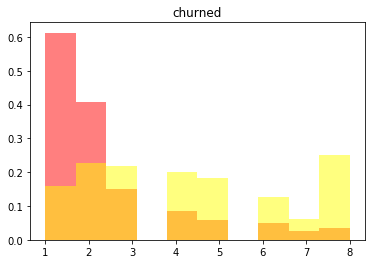

In [675]:
plt.hist(gold[(gold.y==1)].weekmax_streak,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].weekmax_streak,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

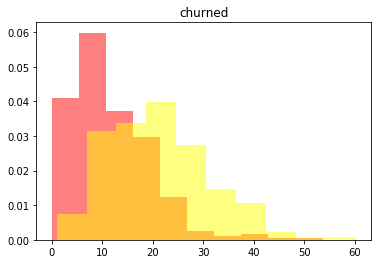

In [676]:
plt.hist(gold[(gold.y==1)].feature_11,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_11,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

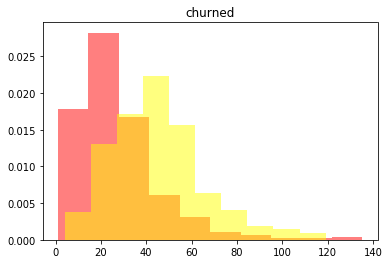

In [677]:
plt.hist(gold[(gold.y==1)].feature_2,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_2,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

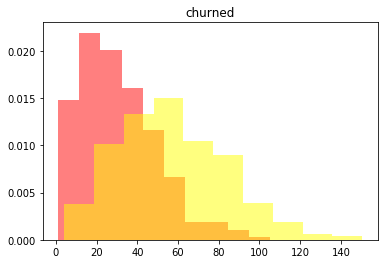

In [678]:
plt.hist(gold[(gold.y==1)].feature_3,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_3,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

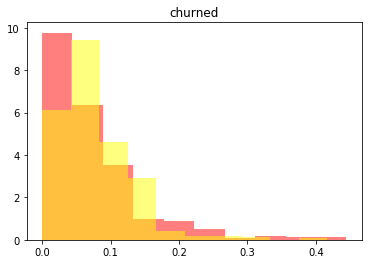

In [679]:
plt.hist(gold[(gold.y==1)].feature_4,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_4,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

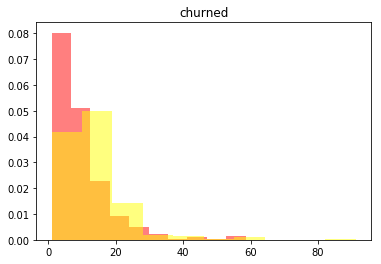

In [680]:
plt.hist(gold[(gold.y==1)].feature_17,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_17,alpha=0.5,color='yellow',density=1)
plt.title('churned')

# there seems to be a difference between the distrobution  of feature 2. 3. and 11 per class

In [681]:
golden_columns=gold.columns.tolist()

In [682]:
gold.head()

,y,weekcount,weekmax_streak,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
courier,,,,,,,,,,,,,,,,,,,,,
3767,1,4,3,0,1.750000,45.500000,46.000,0.040700,0.959300,131.82820,...,2107.008875,0.853000,8.413307,19.000,19.062094,5.192193,0.856450,36.042781,1.5,17.500000
6282,0,6,6,6,1.333333,36.666667,48.500,0.075517,0.924483,111.29100,...,4300.183950,0.881117,8.317717,13.000,21.595879,5.379692,0.880550,72.957087,1.5,6.166667
10622,1,2,2,0,-3.500000,84.500000,54.000,0.119050,0.880950,100.15875,...,2576.890500,0.623800,10.199895,20.500,21.568016,4.179873,0.660300,35.646190,2.5,15.500000
13096,0,2,2,0,0.000000,59.000000,89.500,0.161600,0.838400,104.29600,...,4590.275250,0.686000,9.630672,34.500,17.902412,5.166684,0.720300,84.347978,3.0,19.000000
14261,1,8,8,8,-3.625000,75.500000,70.875,0.018425,0.981575,115.62990,...,3870.750225,0.892537,10.001638,34.875,21.166889,5.433909,0.900662,49.311612,2.5,6.750000


In [683]:
#gold=gold[['y','weekcount','weekmax_streak','weeklatest_streak','feature_5','feature_6','feature_9','feature_10','feature_12','feature_13','feature_14','feature_15']]

## Bringing lifetime info into the mix

In [684]:
#adding lifetime info
lifetime = pd.read_csv(filepath_or_buffer='Courier_lifetime_data.csv')


In [685]:
lifetime.head()

,courier,feature_1,feature_2
0,208,a,25.0
1,218,c,0.0
2,225,c,NaN
3,231,c,0.0
4,242,c,NaN


In [686]:
lifetime.rename(columns={'feature_1':'lifetime_feature_1','feature_2':'lifetime_feature_2'}, inplace=True)

In [687]:
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(lifetime['lifetime_feature_1'])
lifetime['lifetime_feature_1'] = gen_labels

In [688]:
lifetime_encoded= pd.get_dummies(lifetime, columns=['lifetime_feature_1'])

In [689]:
lifetime_encoded=lifetime.copy()

In [690]:
lifetime_encoded.set_index('courier', inplace=True)

In [691]:
lifetime_encoded.head()

,lifetime_feature_1,lifetime_feature_2
courier,,
208,0,25.0
218,2,0.0
225,2,NaN
231,2,0.0
242,2,NaN


In [692]:
#lifetime_encoded=lifetime_encoded.drop('feature_2', axis=1)

In [693]:
gold=gold.merge(lifetime_encoded, how='left', left_index=True, right_index=True)


In [694]:
gold.head()

,y,weekcount,weekmax_streak,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,lifetime_feature_1,lifetime_feature_2
courier,,,,,,,,,,,,,,,,,,,,,
3767,1,4,3,0,1.750000,45.500000,46.000,0.040700,0.959300,131.82820,...,8.413307,19.000,19.062094,5.192193,0.856450,36.042781,1.5,17.500000,1,33.0
6282,0,6,6,6,1.333333,36.666667,48.500,0.075517,0.924483,111.29100,...,8.317717,13.000,21.595879,5.379692,0.880550,72.957087,1.5,6.166667,0,35.0
10622,1,2,2,0,-3.500000,84.500000,54.000,0.119050,0.880950,100.15875,...,10.199895,20.500,21.568016,4.179873,0.660300,35.646190,2.5,15.500000,1,35.0
13096,0,2,2,0,0.000000,59.000000,89.500,0.161600,0.838400,104.29600,...,9.630672,34.500,17.902412,5.166684,0.720300,84.347978,3.0,19.000000,0,35.0
14261,1,8,8,8,-3.625000,75.500000,70.875,0.018425,0.981575,115.62990,...,10.001638,34.875,21.166889,5.433909,0.900662,49.311612,2.5,6.750000,0,44.0


### Using the selected features to impute the missing values from lifetime with KNN imputation 

In [695]:
gold =  pd.DataFrame(KNN(k=2).fit_transform(gold), columns=gold.columns, index=gold.index) 

Imputing row 1/729 with 0 missing, elapsed time: 0.340
Imputing row 101/729 with 0 missing, elapsed time: 0.348
Imputing row 201/729 with 0 missing, elapsed time: 0.356
Imputing row 301/729 with 0 missing, elapsed time: 0.358
Imputing row 401/729 with 0 missing, elapsed time: 0.361
Imputing row 501/729 with 0 missing, elapsed time: 0.362
Imputing row 601/729 with 0 missing, elapsed time: 0.363
Imputing row 701/729 with 0 missing, elapsed time: 0.364


In [696]:
gold.head()

,y,weekcount,weekmax_streak,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,lifetime_feature_1,lifetime_feature_2
courier,,,,,,,,,,,,,,,,,,,,,
3767,1.0,4.0,3.0,0.0,1.750000,45.500000,46.000,0.040700,0.959300,131.82820,...,8.413307,19.000,19.062094,5.192193,0.856450,36.042781,1.5,17.500000,1.0,33.0
6282,0.0,6.0,6.0,6.0,1.333333,36.666667,48.500,0.075517,0.924483,111.29100,...,8.317717,13.000,21.595879,5.379692,0.880550,72.957087,1.5,6.166667,0.0,35.0
10622,1.0,2.0,2.0,0.0,-3.500000,84.500000,54.000,0.119050,0.880950,100.15875,...,10.199895,20.500,21.568016,4.179873,0.660300,35.646190,2.5,15.500000,1.0,35.0
13096,0.0,2.0,2.0,0.0,0.000000,59.000000,89.500,0.161600,0.838400,104.29600,...,9.630672,34.500,17.902412,5.166684,0.720300,84.347978,3.0,19.000000,0.0,35.0
14261,1.0,8.0,8.0,8.0,-3.625000,75.500000,70.875,0.018425,0.981575,115.62990,...,10.001638,34.875,21.166889,5.433909,0.900662,49.311612,2.5,6.750000,0.0,44.0


In [697]:
gold_mt=gold.corr()
gold_mt

,y,weekcount,weekmax_streak,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,lifetime_feature_1,lifetime_feature_2
y,1.000000,-0.534864,-0.442932,-0.415129,-0.287069,-0.420368,-0.502446,-0.056299,0.056297,-0.083037,...,0.086198,-0.464239,0.111303,0.089418,-0.163095,-0.144093,-0.346133,-0.205504,0.070673,-0.192908
weekcount,-0.534864,1.000000,0.912668,0.706565,0.308786,0.590266,0.707429,0.111876,-0.111878,0.048195,...,-0.150237,0.660209,-0.126081,-0.040001,0.163888,0.234505,0.504314,0.346470,-0.078835,0.235847
weekmax_streak,-0.442932,0.912668,1.000000,0.758359,0.291029,0.570816,0.686554,0.103068,-0.103072,0.054061,...,-0.128915,0.640439,-0.122956,-0.037627,0.132579,0.215887,0.514343,0.331719,-0.079939,0.224997
weeklatest_streak,-0.415129,0.706565,0.758359,1.000000,0.267561,0.440527,0.582624,0.053173,-0.053172,0.062711,...,-0.105659,0.539818,-0.090753,-0.048008,0.129388,0.182313,0.462136,0.264182,-0.105425,0.183839
feature_1,-0.287069,0.308786,0.291029,0.267561,1.000000,0.042441,0.121433,-0.008686,0.008689,0.112640,...,-0.053708,0.136845,-0.066519,-0.067824,0.158317,0.139243,0.015898,-0.085310,-0.000419,0.143017
feature_2,-0.420368,0.590266,0.570816,0.440527,0.042441,1.000000,0.809809,0.239526,-0.239527,0.075706,...,-0.151359,0.779639,-0.181660,0.065015,0.044204,-0.137879,0.580537,0.465973,-0.119320,0.179380
feature_3,-0.502446,0.707429,0.686554,0.582624,0.121433,0.809809,1.000000,0.215887,-0.215886,0.102571,...,-0.175278,0.920134,-0.184684,-0.023882,0.103955,0.301933,0.666711,0.481456,-0.168444,0.241790
feature_4,-0.056299,0.111876,0.103068,0.053173,-0.008686,0.239526,0.215887,1.000000,-1.000000,-0.111039,...,-0.206969,0.127558,-0.302300,0.065460,-0.293695,0.072747,0.105103,0.179467,-0.096329,0.111874
feature_5,0.056297,-0.111878,-0.103072,-0.053172,0.008689,-0.239527,-0.215886,-1.000000,1.000000,0.111040,...,0.206973,-0.127555,0.302297,-0.065465,0.293702,-0.072741,-0.105106,-0.179470,0.096329,-0.111873
feature_6,-0.083037,0.048195,0.054061,0.062711,0.112640,0.075706,0.102571,-0.111039,0.111040,1.000000,...,-0.059316,0.085749,-0.028160,0.134707,0.177765,0.008915,0.001523,-0.006208,0.008535,0.049581


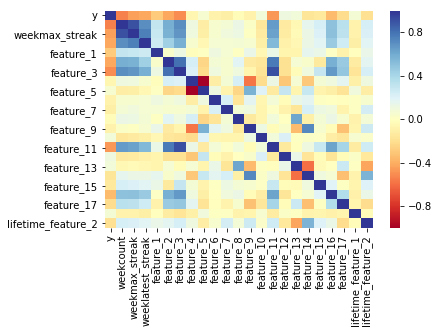

In [698]:
sns.heatmap(gold_mt, vmax=1., square=False,cmap="RdYlBu")

In [699]:
gold=gold.drop('feature_1',axis=1)

# We prepare the golden set

In [700]:
golden_x= gold.drop(['y'], axis=1)
golden_y= gold['y']

In [701]:
#golden_x =  pd.DataFrame(KNN(k=2).fit_transform(golden_x), columns=golden_x.columns, index=golden_x.index) 

In [702]:
golden_x_mt=golden_x.corr()
golden_x_mt

,weekcount,weekmax_streak,weeklatest_streak,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,lifetime_feature_1,lifetime_feature_2
weekcount,1.000000,0.912668,0.706565,0.590266,0.707429,0.111876,-0.111878,0.048195,0.076233,0.131002,...,-0.150237,0.660209,-0.126081,-0.040001,0.163888,0.234505,0.504314,0.346470,-0.078835,0.235847
weekmax_streak,0.912668,1.000000,0.758359,0.570816,0.686554,0.103068,-0.103072,0.054061,0.095443,0.118535,...,-0.128915,0.640439,-0.122956,-0.037627,0.132579,0.215887,0.514343,0.331719,-0.079939,0.224997
weeklatest_streak,0.706565,0.758359,1.000000,0.440527,0.582624,0.053173,-0.053172,0.062711,0.069250,0.076391,...,-0.105659,0.539818,-0.090753,-0.048008,0.129388,0.182313,0.462136,0.264182,-0.105425,0.183839
feature_2,0.590266,0.570816,0.440527,1.000000,0.809809,0.239526,-0.239527,0.075706,0.047748,0.181976,...,-0.151359,0.779639,-0.181660,0.065015,0.044204,-0.137879,0.580537,0.465973,-0.119320,0.179380
feature_3,0.707429,0.686554,0.582624,0.809809,1.000000,0.215887,-0.215886,0.102571,0.051864,0.106556,...,-0.175278,0.920134,-0.184684,-0.023882,0.103955,0.301933,0.666711,0.481456,-0.168444,0.241790
feature_4,0.111876,0.103068,0.053173,0.239526,0.215887,1.000000,-1.000000,-0.111039,0.078035,0.237495,...,-0.206969,0.127558,-0.302300,0.065460,-0.293695,0.072747,0.105103,0.179467,-0.096329,0.111874
feature_5,-0.111878,-0.103072,-0.053172,-0.239527,-0.215886,-1.000000,1.000000,0.111040,-0.078025,-0.237496,...,0.206973,-0.127555,0.302297,-0.065465,0.293702,-0.072741,-0.105106,-0.179470,0.096329,-0.111873
feature_6,0.048195,0.054061,0.062711,0.075706,0.102571,-0.111039,0.111040,1.000000,0.227167,-0.167097,...,-0.059316,0.085749,-0.028160,0.134707,0.177765,0.008915,0.001523,-0.006208,0.008535,0.049581
feature_7,0.076233,0.095443,0.069250,0.047748,0.051864,0.078035,-0.078025,0.227167,1.000000,0.075268,...,-0.063482,0.020889,-0.080034,-0.158228,0.238784,0.123961,0.095060,-0.072382,0.012397,0.246738
feature_8,0.131002,0.118535,0.076391,0.181976,0.106556,0.237495,-0.237496,-0.167097,0.075268,1.000000,...,-0.068031,0.091907,0.001361,0.619658,-0.094674,0.074980,0.132124,0.050741,-0.084618,0.078957


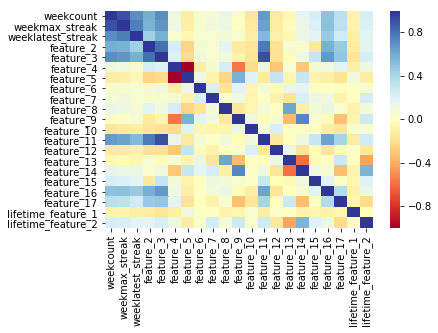

In [703]:
sns.heatmap(golden_x_mt, vmax=1., square=False,cmap="RdYlBu")

In [704]:
x_train, x_test, y_train, y_test = train_test_split(golden_x,golden_y , test_size=0.25)

In [705]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# LogisticRegression

Accuracy of logistic regression classifier on test set: 0.78
             precision    recall  f1-score   support

        0.0       0.78      0.74      0.76        88
        1.0       0.77      0.81      0.79        95

avg / total       0.78      0.78      0.78       183



Text(0.5,15,'Predicted label')

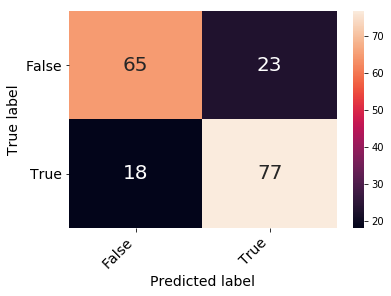

In [706]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
test_y_pred = clf.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))
print(classification_report(y_test, test_y_pred))
confusion_matrix_df = pd.DataFrame(cf_mt, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


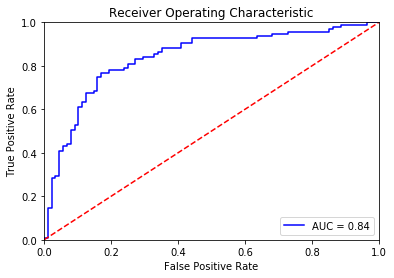

In [707]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.83')

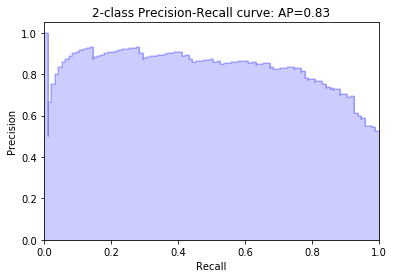

In [708]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Logistic regression grid search

In [709]:

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.7344322344322345


Accuracy of logistic regression classifier on test set: 0.77
             precision    recall  f1-score   support

        0.0       0.78      0.73      0.75        88
        1.0       0.76      0.81      0.79        95

avg / total       0.77      0.77      0.77       183



Text(0.5,15,'Predicted label')

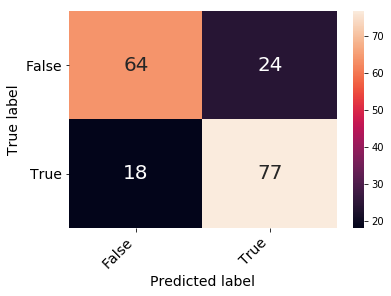

In [710]:
test_y_pred = logreg_cv.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_cv.score(x_test, y_test)))
print(classification_report(y_test, test_y_pred))
confusion_matrix_df = pd.DataFrame(cf_mt, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

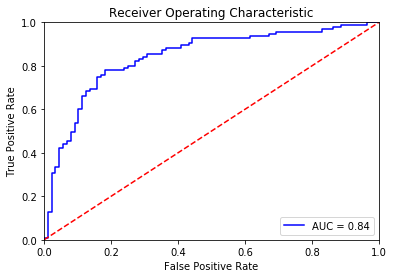

In [711]:
probs = logreg_cv.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.83')

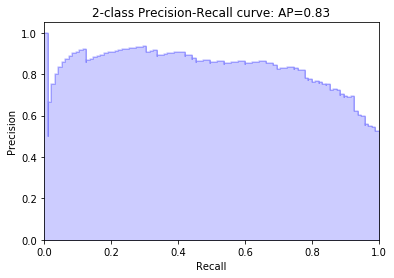

In [712]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Logistic cross validation score

0.7704918032786885
Accuracy: 0.803 (0.063)
Logloss: -0.499 (0.051)
AUC: 0.849 (0.057)


Text(0.5,15,'Predicted label')

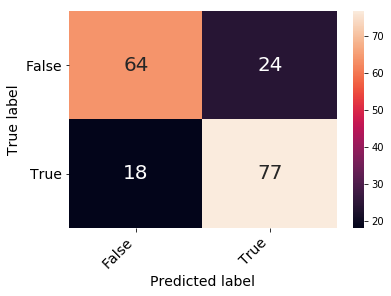

In [713]:
logreg_cv.fit(x_train,y_train)
print(logreg_cv.score(x_test, y_test))
seed = 7
k_fold = KFold(n_splits=4, random_state=seed)
scoring = 'accuracy'
results=cross_val_score(logreg_cv, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'neg_log_loss'
results=cross_val_score(logreg_cv, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'roc_auc'
results=cross_val_score(logreg_cv, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

predicted=logreg_cv.predict(x_test)
matrix = confusion_matrix(y_test, predicted)



confusion_matrix_df = pd.DataFrame(matrix, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

# XGBOOST Classifier

In [714]:
xclas = XGBClassifier()  # and for classifier  
xclas.fit(x_train, y_train)  


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

             precision    recall  f1-score   support

        0.0       0.78      0.73      0.75        88
        1.0       0.76      0.81      0.79        95

avg / total       0.77      0.77      0.77       183



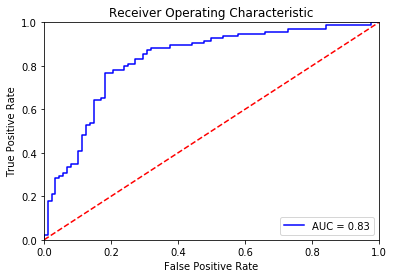

In [715]:
probs = xclas.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(classification_report(y_test, test_y_pred))
plt.show()

In [716]:
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthreads=-1)  

In [717]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(x_train, y_train)  


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013B8ED25FD0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013B8ED025F8>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013B8EE0A550>, 'cols...40>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013B8ECFF240>},
          pre_dispatch='2*n_jobs', random_state=None, refit=Tr

In [718]:
y_pred=gs.predict(x_test)  
predictions = [round(value) for value in y_pred]

In [719]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.14%


             precision    recall  f1-score   support

        0.0       0.78      0.73      0.75        88
        1.0       0.76      0.81      0.79        95

avg / total       0.77      0.77      0.77       183



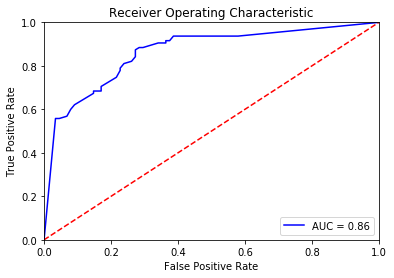

In [720]:
preds = y_pred
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(classification_report(y_test, test_y_pred))
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.86')

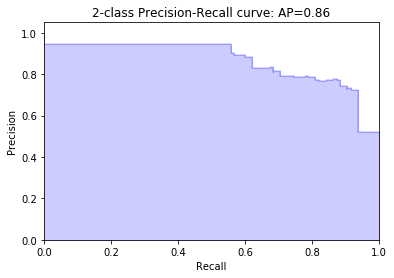

In [721]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# SVM

0.7486338797814208
Accuracy: 0.732 (0.089)
[[62 26]
 [20 75]]


Text(0.5,15,'Predicted label')

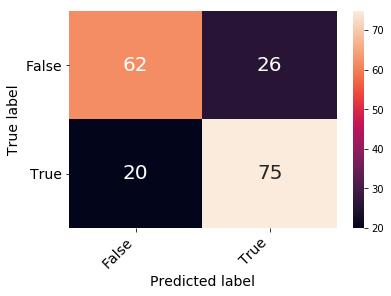

In [722]:
clf = svm.SVC(C=1,kernel='rbf',probability=True,gamma='auto')
clf.fit(x_train,y_train)
print(clf.score(x_test, y_test))
seed = 7
k_fold = KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = results=cross_val_score(clf, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))


clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)


confusion_matrix_df = pd.DataFrame(matrix, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

             precision    recall  f1-score   support

        0.0       0.78      0.73      0.75        88
        1.0       0.76      0.81      0.79        95

avg / total       0.77      0.77      0.77       183



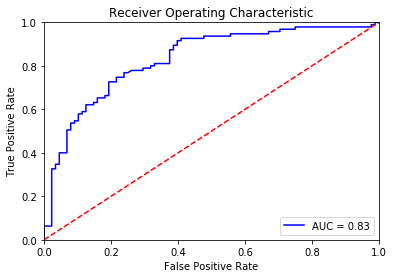

In [723]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(classification_report(y_test, test_y_pred))
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.83')

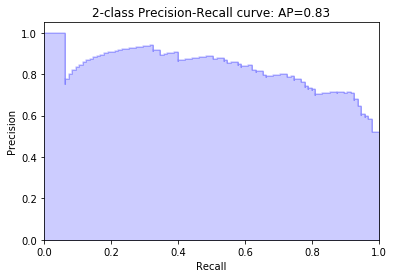

In [724]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Random Forest

In [751]:
randomForest = RandomForestClassifier( max_depth=5, max_features=10, min_samples_split=5, n_estimators=100)
randomForest.fit(x_train, y_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(x_test, y_test)))

Accuracy of random forest classifier on test set: 0.80


In [752]:
test_y_pred = randomForest.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
cf_mt

array([[70, 18],
       [19, 76]], dtype=int64)

0.7978142076502732
Accuracy: 0.754 (0.083)
Logloss: -0.536 (0.154)
AUC: 0.807 (0.098)
[[68 20]
 [19 76]]


Text(0.5,15,'Predicted label')

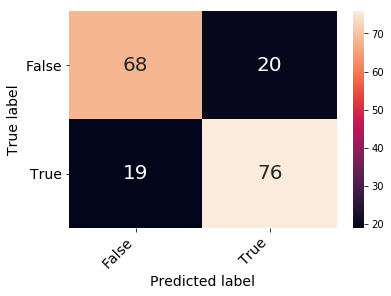

In [753]:
print(randomForest.score(x_test, y_test))
seed = 7
k_fold = KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'neg_log_loss'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'roc_auc'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

randomForest.fit(x_train,y_train)
predicted=randomForest.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)


confusion_matrix_df = pd.DataFrame(matrix, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

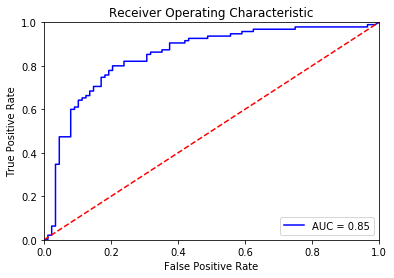

In [754]:
probs = randomForest.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature ranking:
1. feature 4 (0.173951)
2. feature 0 (0.169111)
3. feature 3 (0.097706)
4. feature 2 (0.078180)
5. feature 12 (0.069118)
6. feature 15 (0.042130)
7. feature 7 (0.037117)
8. feature 8 (0.035483)
9. feature 11 (0.030795)
10. feature 20 (0.030787)
11. feature 13 (0.030629)
12. feature 9 (0.028605)
13. feature 17 (0.027041)
14. feature 14 (0.025476)
15. feature 10 (0.023829)
16. feature 16 (0.022391)
17. feature 18 (0.021927)
18. feature 1 (0.020995)
19. feature 6 (0.018537)
20. feature 5 (0.014948)
21. feature 19 (0.001242)


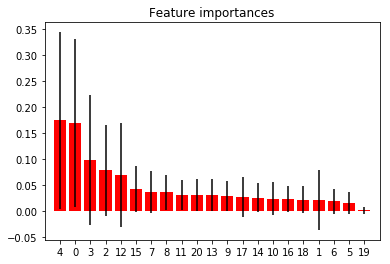

In [755]:
importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(golden_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(golden_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(golden_x.shape[1]), indices)
plt.xlim([-1, golden_x.shape[1]])
plt.show()

In [741]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5,10,15]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [742]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train, y_train)

    
    y_pred = grid_search.predict(x_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [743]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'max_depth': 5, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg        68        20
pos        21        74


In [733]:
# test